Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nazar Yaremko"  
COLLABORATORS = "Daniel Hernandez - helped me understand the purpose of the recursiveness in algorithms more effectively; Svitlana Midianko - helped me understand how to solve recursive equations which was helpful for this assignment"

---


# CS110 Spring 2020- Assignment 1
# Divide and Conquer Sorting Algorithms

This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

Every CS110 assignment begins with a check-up on your class responsibilities and professional standing. If you have submitted make-up work, you will also receive formative feedback on it, accompanied by a grade reflecting on your ability to address one of the course LOs. Thus to complete the first part of this assignment, you will need to take a screenshot of your CS110 dashboard on Forum where the following is visible:

* your name.
* your absences for the course have been set to excused up to the last session from week 2 (inclusively) .

This will be evidence that you have submitted acceptable pre-class and make-up work for a CS110 session you may have missed. Please check the specific CS110 make-up and pre-class policies in the syllabus of the course.


**NOTES:**

1. Your assignment submission needs to include the following resources:

* A PDF file must be the first resource. This file must be generated from the template notebook where you have written all of the answers (check this [link](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit#heading=h.10jakf1cwxpq) for instructions on how to do this). Make sure that the PDF displays properly (all text and code can be seen within the paper margins), and that your work is neat and clearly presented. 
* Your second resource must be the template notebook you have downloaded from the gist provided and where you included your answers. The name of this resource must include your own name. Submit this file directly following the directions in this picture:


<img src="images/upload.png" width="800" height="200">

If you are unable to submit the jupyter notebook directly, please compress all the materials of your submission, and submit the zip file as your second resource instead.

2. Tasks (1)-(7) will be graded on the indicated LOs; please make sure to consult their descriptions and rubrics in the course syllabus. You will not be penalized for not attempting the optional challenge.

3. In this first assignment, you will receive formative feedback on your reference, application and justification of the HCs but no actual grades. Only in subsequent assignments will the HCs applications be graded. This is an opportunity for you to deepen your argumentation skills without generating a grade. 

As such, after completing the assignment, evaluate the application of the HCs you have identified prior to and while you were working on this assignment and footnote them (refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work). 

Here are some examples of weak applications of some of the relevant HCs:

* Example 1: “#algorithms: I wrote an implementation of Bubble sort”. 
    * This is an extremely superficial use of the HC in a course on Algorithms, and your reference will be graded accordingly. Instead, consider what constitutes an algorithm (see Cormen et al., sections 1.1 and 1.2). Once you have a good definition of an algorithm, think of how this notion helped you approach the implementation of the algorithm, analyze its complexity and understand why it’s important to write an optimal Python implementation of the algorithm.

* Example 2: “#dataviz: I plotted nice curves showing the execution time of bubble sort, or I plotted beautiful curves with different colors and labels.”

    * Again, these two examples are very superficial uses of the HC #dataviz. Instead, consider writing down how do the plots and figures helped you interpret, analyze and write concluding remarks from your experiments. Or write about any insight you included in your work that came from being able to visualize the curves.


* Example 3: “#professionalism: I wrote a nice paper/article that follows all the directions in this assignment.” 

    * By now, you should realize that this is a poor application of the HC #professionalism. Instead, comment on how you actively considered the HC while deciding on the format, length, and style for writing your report.

4. Your code will be tested for similarity using Turnitin, both to other students’ work and examples available online. As such, be sure to cite all references that you used in devising your solution. Any plagiarism attempts will be referred to the ASC, as per the course’s policy in the syllabus.


** Complete the following tasks which will be graded in the designated LOs and foregrounded HCs (please consult the LOs rubrics on the syllabus):**

## Question 1. [HCs #responsibility; appropriate LO]

Submit a screenshot of your CS110 dashboard with the information described above. You can do this by writing:
```
from IPython.display import Image
Image(filename=’your_screenshot.png’)
```

https://docs.google.com/document/d/1TLx1djVBQjhY4WjHHk264pJPUIoMYpzhzHY0vsj64s0/edit?usp=sharing

## Question 2. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort algorithm discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list.**


In [2]:
#importing all of the necessary libraries for the following codes
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import random as random

In [3]:
#THESE FUNCTION ARE THE COMPONENTS OF THE FINAL THREE WAY MERGE FUNCTION
def three_way_merge1(A, p, q1, q2, r):
    """Implements three-way marge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    #creating three lists: for simplicity I called them L, M and R (for left, middle and right)
    #infinity is added to make sure that all of the numbers of all lists are compared (if we reach the end of
    #one list the loop won't stop, because infinity cannot be smaller than anything)
    L = A[p:q1] + [float("inf")]
    M = A[q1:q2] + [float("inf")]
    R = A[q2:r] + [float("inf")]
    #initializing the indexing variables to be 0
    i = j = k = 0
    #iterating throught he length of A
    for s in range(p,r): 
        #comparing the ith element of the L list ot kth and jth elements of lists R and M
        if L[i] <= R[k] and L[i] <= M[j]:
            #if the statement is true, the sth element in A becomes L[i]
            A[s] = L[i]
            #moving the marker in L list 1 number to the right
            i = i+1
        #comparing jth element of M to kth and ith elements of R and L
        elif M[j] <= R[k]:
            #if the statement is true, the sth element in A becomes L[i]
            A[s] = M[j]
            #moving the marker in M list 1 number to the right
            j = j+1
        else:
            #the only not compared element form 3 lists in this case would be R[k], therefore it must be
            #the smallest
            A[s] = R[k]
            #moving the marker in R list 1 number to the right
            k = k+1
    return A

def three_way_merge_sort1(A,p,r):
    #setting the base case to be at least 2
    if r-p >= 2:
        #calculating the values of two points that will break the list into three sublists 
        q1 = p + math.ceil((r-p)/3)
        q2 = q1+ math.ceil((r-p)/3)
        #recursively calling the function to break the list down into sublists until the base case is reached
        three_way_merge_sort1(A,p,q1)
        three_way_merge_sort1(A,q1,q2)
        three_way_merge_sort1(A,q2,r)
        #this funciton then merges the sublists into a sorted array
        three_way_merge1(A, p, q1,q2, r)
    return A

#final function that needs only one parameter. It also checks if the input is a numpy array and if yes, converts
#it into a list
def three_way_merge(A):
    if type(A) != list:
        A = A.tolist()
        three_way_merge_sort1(A,0,len(A))
        return A
    else:
        three_way_merge_sort1(A,0,len(A))
        return A

__#algorithms:__ This HC is applied here particularly well, because recursive technique is correctly used to implement a three-way merge sort. This is a strong application because it required deep understanding of the code and it's goal. I strengthen my application by concise descriptions of different lines of the code that improve its readability.

In [4]:
#checking three edge-cases:
#All negative numbers in a reversed order
print(three_way_merge([-1,-2,-3,-4,-5,-6,-7,-8,-9]))
#A list that contains duplicate numbers
print(three_way_merge([7,5,5,5,5,4]))
#An empty list
print(three_way_merge([]))

[-9, -8, -7, -6, -5, -4, -3, -2, -1]
[4, 5, 5, 5, 5, 7]
[]


In [5]:
assert(three_way_merge([4,3,2,1]) == [1,2,3,4])
assert(three_way_merge(np.array([4,3,2,1])) == [1,2,3,4]) 

## Question 3.  [#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique] 

Implement a second version of a three-way merge sort that calls bubble sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify on the basis of theoretical and potentially also experimental arguments what might be an appropriate threshold for the input array for applying bubble sort.


In [6]:
#THESE FUNCTIONS ARE COMPONENTS OF THE FINAL EXTENDED THREE WAY MERGE SORT
#this is an extended version of three_way_merge_sort1. The difference is that it calls on bubble sort if the length 
#of the sublist is smaller than 40
def three_way_merge_sort2(A,p,r):
    if r-p < 10:
        A[p:r] = bubbleSort(A[p:r])
    else:
        q1 = p + math.ceil((r-p)/3)
        q2 = q1+ math.ceil((r-p)/3)
        three_way_merge_sort2(A,p,q1)
        three_way_merge_sort2(A,q1,q2)
        three_way_merge_sort2(A,q2,r)
        three_way_merge1(A, p, q1,q2, r)
        return A

#this is a standard bubble sort algorithm that that at each compares two numbers at each step 
#and swaps them if number i is bigger than i+1
def bubbleSort(A):
    for i in range(len(A)-1):
        for j in range(len(A)-1-i):
            if A[j] > A[j+1]:
                #this lines swaps two numbers
                A[j+1], A[j] = A[j],A[j+1]
    return A

We know that worst-case scenario time complexity for bubble sort is __O(n^2)__ whereas for three-way merge sort it is __O(nlogn)__. However, if we break down the amount of steps, the three-way marge sort requires additional constant steps to sort the algorithm, which will affect the efficiency because the algorithm will have to sort a huge amount of small lists after breaking them down and the constants will a considerable impact. Below I have provided time performance of bubble sort vs three-way merge sort for small lists and as we can see, small lists are sorted faster with bubble sort. After testing different numbers from 5 to 20 with bigger lists, the optimal threshhold was chosen - 10. A graph with the results is provided in the answer to Question 6.

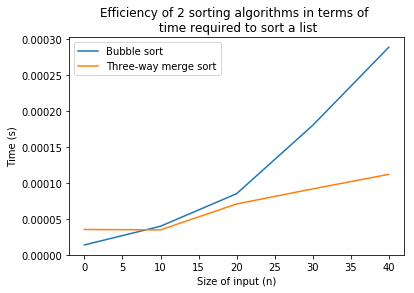

In [7]:
#TESTING THE TIMES IT TAKES FOR TWO ALGORITHMS TO SORT SMALL LISTS
#MORE DETAIL DECRIPTION OF HOW TO EVALUATE THE TIME IT TAKE TO SORT A LIST WILL BE PROVIDED FURTHER
test_1 = []
for k in range(1,6):
    list_k = []
    for i in range(10*k, 0, -1):
        list_k.append(i)
    a = time.time()
    bubbleSort(list_k)
    b = time.time()
    test_1.append(b-a)
    
test_2 = []
for k in range(1,6):
    list_k = []
    for i in range(10*k, 0, -1):
        list_k.append(i)
    a = time.time()
    three_way_merge(list_k)
    b = time.time()
    test_2.append(b-a)
    
x = [0,10,20,30,40]


plt.plot(x,test_1,label = "Bubble sort")
plt.plot(x,test_2,label = "Three-way merge sort")
plt.title("Efficiency of 2 sorting algorithms in terms of \n time required to sort a list")
plt.ylabel("Time (s)")
plt.xlabel("Size of input (n)")
plt.legend(loc="upper left")

In [8]:
#this is the final extended_three_way_merge_sort that requires one parameter and checks whether the parameter
#is a numpy array and if yes, converts it into a list
def extended_three_way_merge_sort(A):
    """Implements the second version of a three-way merge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    Output: a sorted Python list"""
    if type(A) != list:
        A = A.tolist()
        three_way_merge_sort2(A,0,len(A))
        return A
    else:
        three_way_merge_sort2(A,0,len(A))
        return A

In [9]:
assert(extended_three_way_merge([4,3,2,1]) == [1,2,3,4])
assert(extended_three_way_merge(np.array([4,3,2,1])) == [1,2,3,4]) 

NameError: name 'extended_three_way_merge' is not defined

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an n-element array and the number of buckets, k, to be used during sorting.  Then, the algorithm distributes the elements of the input array into k-different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. Here is pseudocode for the BucketSort algorithm:

<img src="images/bucket.png" width="800" height="200">

The BucketSort code above calls the function GetBucketNum  (see the pseudocode below) to distribute all the elements of array A into k-buckets.  Every element in the array is assigned a bucket number based on its value (positive or negative numbers). GetBucketNum returns the bucket number that corresponds to element A[i].   It takes as inputs the element of the array, A[i], the max and min elements in A, the size of the intervals in every bucket (e.g., if you have numbers with values between  0 and 100 numbers and 5 buckets, every bucket has an interval of size 20 = [100-0]/5).  Notice that in pseudocode, the indices of the arrays are from 1 to n. Thus, GetBucketNum consistently returns a number between 1 and n (make sure you account for this in your Python program).


<img src="images/getbucketnum.png" width="800" height="200">

Write a Python 3 implementation of BucketSort that uses the bubble sort algorithm for sorting the individual buckets in line 10 of the algorithm.

In [10]:
#THESE FUNCTIONS ARE COMPONENTS OF THE FINAL BUCKET_SORT FUNCTION

#This function returns the bucket numebr that corresponds to element A[i]
#The point of this function is to distribute the numbers into the bucket so every bucket had a certain interval 
#of the number. Therfore it compares the number to the minimum and maximum values.
def GetNum (a, mn, mx, sz, k):
    if a == mx:
        j = k
    elif a == mn:
        j = 0
    else:
        #here it incrementaly compares the values of the number to minimum value plus size*j where j is a 
        #variable that incrementally grows. In this way we get intervals that have a size of size of the arrays
        j = 0
        while a >= mn+ (sz*j):
            j += 1
    return j

#This function creates k buckets and distributes the elements into them for further sorting
def bucket(A, k):
    #these three functions identify minimum and maximum values of the list and its size
    mn = min(A)
    mx = max(A)
    sz = math.ceil((mx - mn)/k) 
    #creating k empty buckets
    buckets = [ [] for i in range(k+1) ]
    #iterating all of the elements in the list
    for i in range(0, len(A)):
        #calling the GetNum function that returns a number and puts it in a certain bucket
        b = GetNum(A[i], mn, mx, sz, k)
        buckets[b].append(A[i])
    #in this part the algorithm goes through all buckets and applies bubble sort on all of them
    for i in range(0, k+1):
        bubbleSort(buckets[i])
    
    #here we add numbers from all the buckets into the finalized sorted list
    A = []
    for i in range(0,k+1):
        A = A + buckets[i]
    return A

In [11]:
#this is the final bucket_sort that requires two parameters and checks whether the first parameter
#is a numpy array and if yes, converts it into a list
def bucket_sort(A,k):
    """Implements BucketSort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""
    if type(A) != list:
        A = A.tolist()
        return bucket(A,k)
    else:
        return bucket(A,k)   

In [12]:
assert(bucket_sort([4,3,2,1], 1) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1]), 1) == [1,2,3,4])
assert(bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability]

Implement a second version of the BucketSort algorithm. This time in line 10 of BucketSort apply the Bucket sort algorithm recursively until the size of the bucket is less than or equal to k, the base case (notice that fewer than k partitions will be inefficient).


In [13]:
#THIS FUNCTION IS A COMPONENT OF THE FINAL FUNCTION
def extended_bucket(A, k):
    #lines 3-12 are the same procedures as in the regular bucket_sort described earlier
    mn = min(A)
    mx = max(A)
    #this line allows to prevent any comparisons in the bucket if it consists of the duplicates or has only one number
    if mn == mx:
        return A
    sz = math.ceil((mx - mn)/k) 
    buckets = [ [] for i in range(k+1) ]
    for i in range(0, len(A)):
        b = GetNum(A[i], mn, mx, sz, k)
        buckets[b].append(A[i])
    #In this part we extend a bucket sort: we go through all of the buckets and use the function ENUMERATE that
    #does not only iterate through the buckets but also keeps track of the number of interations
    for i, bucket in enumerate(buckets):
        if len(bucket) > 1:
            #in this way we go through all of the buckets AND subbuckets that we create by breaking the buckets
            #down into smaller subbuckets
            buckets[i] = extended_bucket_sort(bucket, k)
            
    #here we are creating the final sorted list by adding numebrs for all of the buckets
    A = []
    for i in range(0,k+1):
        A = A + buckets[i]
    return A

In [14]:
#this is the final extended_bucket_sort that requires two parameters and checks whether the first parameter
#is a numpy array and if yes, converts it into a list
def extended_bucket_sort(A,k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""
    if type(A) != list:
        A = A.tolist()
        return extended_bucket(A,k)
    else:
        return extended_bucket(A,k)   

In [15]:
assert(extended_bucket_sort([4,3,2,1], 1) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1]), 1) == [1,2,3,4])
assert(extended_bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the augmented merge sort from (3) by producing a plot that illustrates how every running time grows with input size. Make sure to:

1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


In [16]:
#This is a standard merge function that we need for the comparison 

def merge(A):
    #defining the base case to be 1
    if len(A)>1:
        #calculating the index of the marker that will break the list down into two sublists
        q = len(A)//2
        #creating two sublists: L and R
        L = A[:q]
        R = A[q:] 
        #recursively calling the merge function to break down and collect back both L and R lists. 
        merge(L)
        merge(R)
        
        #initializing the indexing variables
        i = j = k = 0
        #lines 18-35 comapre the elements of the created sublists like in three_way_merge1, except this time
        #we use the while loop
        while i < len(L) and j < len(R): 
            if L[i] < R[j]:
                A[k] = L[i]
                i += 1
            else:
                A[k] = R[j]
                j += 1
            k += 1
            
        while i < len(L):
            A[k] = L[i]
            i += 1
            k += 1
            
        while j < len(R):
            A[k] = R[j]
            j += 1
            k += 1
            
    return(A)

In [17]:
#TIMES OF THE TWO-WAY MERGE SORT

#creating an empty list
t1_1 = []
#going through different values of k (from 1 to 99)
for k in range(1,100):
    #creating an empy list for the list we want to sort
    list_k = []
    #this function creates a list with 100*k elements in reversed order
    for i in range(100*k, 0, -1):
        list_k.append(i)
    #initializing time
    a = time.time()
    #calling the function on the list
    merge(list_k)
    #finalizing time
    b = time.time()
    #calculating the time it took for the function to sort the list
    t1_1.append(b-a)
    
#TIMES OF THE THREE_WAY MERGE SORT
#THE SAME PROCEDURES AS LINES 6-19
t2 = []
for k in range(1,100):
    list_k = []
    for i in range(100*k, 0, -1):
        list_k.append(i)
    a = time.time()
    three_way_merge(list_k)
    b = time.time()
    t2.append(b-a)
    
#TIMES OF THE EXTENDED THREE_WAY MERGE SORT
#THE SAME PROCEDURES AS LINES 6-19
t3 = []
for k in range(1,100):
    list_k = []
    for i in range(100*k, 0, -1):
        list_k.append(i)
    a = time.time()
    extended_three_way_merge_sort(list_k)
    b = time.time()
    t3.append(b-a)

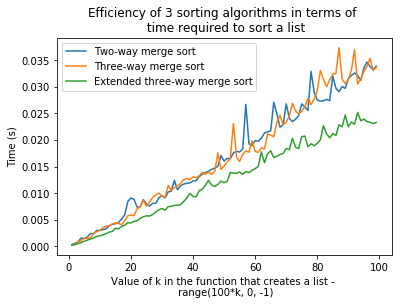

In [18]:
#Here we create data visualizations for the run-times of three algorithms
#creating an x variable that is basically a list of numbers form 1 to 99
x = list(range(1,100))

#plotting three time lists against the x variables
plt.plot(x,t1_1,label = "Two-way merge sort")
plt.plot(x,t2,label = "Three-way merge sort")
plt.plot(x,t3,label = "Extended three-way merge sort")

#creating a title, legend and labeling x and y axes
plt.title("Efficiency of 3 sorting algorithms in terms of \n time required to sort a list")
plt.ylabel("Time (s)")
plt.xlabel("Value of k in the function that creates a list - \n range(100*k, 0, -1)")
plt.legend(loc="upper left")

__#dataviz:__ This and the following data visualizations were crucial to show the differentce between run times of three different algorithms. It is properly labaled, and shows the information clearly.

Based on the graph we can see that two-way merge sort, three-way merge sort and extended three-way merge sort algorithms have approximatly the same growth of running time as the input size increases. Theoretical time complexities of two-way and three-way merge sorts are both __O(nlogn)__ - the difference is in the base of logarithm which is a constant and therefore is negligible when evaluating growth of a function. The graph is in agreement with this - we can see that the orange (three-way merge) and blue (two-way merge) lines have a similar growth. Regarding the extended three-way merge, it is taking advantage of the ability of bubble sort to quickly sort small agorithms and it performs slightly faster. That being said, the growth of the extended three-way merge would also be __O(nlogn)__, however the base would be much larger as our base case is not 1 anymore, but 10, so it would take around n/k^i = 10 steps to break everything down. This would take logn steps with a base of 30. Because logarithms with bigger bases grow slower, this would explain the slower growth of the extended three-way merge.

The results provided on this figure correspond to the theoretical predictions. All of these functions show linear growth as expected. 

It is important to mention that performance of these algorithm is valid not in all cases. The time it takes to sort and algorithm depends on the speed of the computer and therefore, these results would likely be different for more or less powerful computers. A more objective measure of the efficiency would be a number of steps as it would depend solely on the algorithm and not on any characteristics of the computer. 



## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort, and extended_bucket_sort by producing a plot that illustrates how the algorithms' runtimes depend on both the input size and the nature of the input (e.g., totally randomized inputs vs inversely sorted inputs). Make sure to:

1. define what each algorithm's complexity is in terms of the BigO notation
2. enumerate the explicit assumptions made to assess each algorithm's run time
3. analyze the running times on inputs of at least three different natures
4. and compare your benchmarks with the theoretical result we have discussed in class.


In [19]:
#TIMES OF THE MERGE BUT FOR RANDOMIZED LISTS.
t1_2 = []
for k in range(1,100):
    list_k = []
    #This function creates a list of k*100 random numbers in the range -100*k to 100*k .
    res = [random.randrange(-100, 100) for i in range(k*100)] 
    for i in (res):
        list_k.append(i)
    a = time.time()
    merge(list_k)
    b = time.time()
    t1_2.append(b-a)

t1_3 = []
for k in range(1,100):
    list_k = []
    #This function creates a list of k*100 random numbers in the range -100*k to 100*k .
    res = [random.randrange(k*-100, k*100) for i in range(k*100)] 
    for i in (res):
        list_k.append(i)
    a = time.time()
    merge(list_k)
    b = time.time()
    t1_3.append(b-a)
    
#TIMES OF THE BUCKET SORT
#THE SAME PROCEDURES AS WHEN WE CALCUALTED TIMES FOR THREE_WAY_SORT AND EXTENDED_THREE_WAY_MERGE_SORT
t4_1 = []
for k in range(1,100):
    list_k = []
    for i in range(100*k, 0, -1):
        list_k.append(i)
    a = time.time()
    bucket_sort(list_k, 40)
    b = time.time()
    t4_1.append(b-a)

#THE SAME PROCEDURES AS LINES 2-12 (in this cell)
#Choice of 40 for for the value of k in the bucket sort algorithms was arbitrary but after trying out different values
#like len(A), len(A)/10, 200, 100, etc. 40 seemed to make the algorithm the most efficient.
t4_2 = []
for k in range(1,100):
    list_k = []
    res = [random.randrange(-100, 100) for i in range(k*100)] 
    for i in (res):
        list_k.append(i)
    a = time.time()
    bucket_sort(list_k, 40)
    b = time.time()
    t4_2.append(b-a)

t4_3 = []
for k in range(1,100):
    list_k = []
    res = [random.randrange(k*-100, k*100) for i in range(k*100)] 
    for i in (res):
        list_k.append(i)
    a = time.time()
    bucket_sort(list_k, 40)
    b = time.time()
    t4_3.append(b-a)

#TIMES OF THE EXTENDED BUCKET SORT
#THE SAME PROCEDURES AS WHEN WE CALCUALTED TIMES FOR THREE_WAY_SORT AND EXTENDED_THREE_WAY_MERGE_SORT
t5_1 = []
for k in range(1,100):
    list_k = []
    for i in range(100*k, 0, -1):
        list_k.append(i)
    a = time.time()
    extended_bucket_sort(list_k, 40)
    b = time.time()
    t5_1.append(b-a)

#THE SAME PROCEDURES AS LINES 2-12 (in this cell)
t5_2 = []
for k in range(1,100):
    list_k = []
    res = [random.randrange(-100, 100) for i in range(k*100)] 
    for i in (res):
        list_k.append(i)
    a = time.time()
    extended_bucket_sort(list_k, 40)
    b = time.time()
    t5_2.append(b-a)


t5_3 = []
for k in range(1,100):
    list_k = []
    res = [random.randrange(k*-100, k*100) for i in range(k*100)] 
    for i in (res):
        list_k.append(i)
    a = time.time()
    extended_bucket_sort(list_k, 40)
    b = time.time()
    t5_3.append(b-a)
    

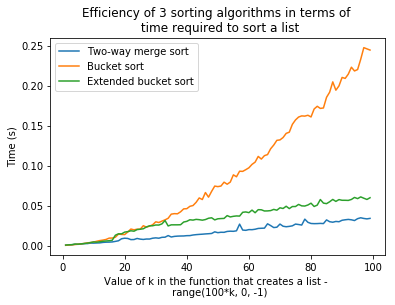

In [20]:
#Here we create data visualizations for the run-times of three algorithms
#THIS GRAPH WILL REPRESENT THE EFFICIENCY OF THREE ALGORITHMS FOR LISTS SORTED IN A REVERSED ORDER

x = list(range(1,100))

plt.plot(x,t1_1,label = "Two-way merge sort")
plt.plot(x,t4_1,label = "Bucket sort")
plt.plot(x,t5_1,label = "Extended bucket sort")

plt.title("Efficiency of 3 sorting algorithms in terms of \n time required to sort a list")
plt.ylabel("Time (s)")
plt.xlabel("Value of k in the function that creates a list - \n range(100*k, 0, -1)")
plt.legend(loc="upper left")

Two-way merge sort time complexity: __O(nlogn)__  
Bucket sort algorithm time complexity: __O(n^2)__  - This is in case all of the numbers end up in one bucket and time complexity of the bucket sort becomes time complixty of bubble sort O(n^2)  
Extended bucket sort: __O(klogn)__ - This result is intuitive and is based on the fact that we the recursive algorithm is trying to break the buckets into subbuckets until the lengths of all subbuckets are 1 or 0. Therefore, we would have to break the list i times until we reach the length of 1. We can now create an equation similar to one in merge sort where n/k^i = 1, where k is a number of buckets. Then i is log(n) with a base of k which has to be multiplied by the number of elements at each level which is close to k (depending on how many times we have to break down the new buckets).

Overall, time complexity of the bucket sort depends on how uniformly distributed the lists are. Given that the first graph represents the results of sorting a uniformly distributed list (all of the numbers appear once and are in reversed order), the extended bucket sort performs better than the normal bucket sort because every bucket has approximately the same amount of items. This is better because if the list was not uniformly distributed, some buckets would have more numbers and the bucket sort would take over, increasing the time needed to sort the list (since time complexity of bubble sort for reversed lists is O(N^2)). In this case, however, the strength of the algorithm is utilized, because the list is broken down into relatively similar sublists. Finally, we can see that the two-way merge sort/extended bucket sort indeed show a linear growth and growth of bucket sort is close to quadratic.

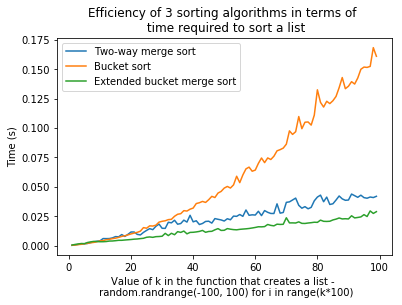

In [21]:
#EFFICIENCY OF THREE ALGORITHMS FOR RANDOMIZED LISTS WITH A NARROW RANGE

x = list(range(1,100))
plt.plot(x,t1_2,label = "Two-way merge sort")
plt.plot(x,t4_2,label = "Bucket sort")
plt.plot(x,t5_2,label = "Extended bucket merge sort")

#creating a title, legend and labeling x and y axes
plt.title("Efficiency of 3 sorting algorithms in terms of \n time required to sort a list")
plt.ylabel("Time (s)")
plt.xlabel("Value of k in the function that creates a list - \n random.randrange(-100, 100) for i in range(k*100)")
plt.legend(loc="upper left")

Here we can see that all of the algorithms performed better than in the previous test. Also we can observe that the difference between the performance of bucket sort and extended bucket sort is even bigger. The input now less uniformly distributed (because it is randomized and the bounds are very tight - from -100 to 100 for thousands of numbers) and therefore, some buckets can be bigger and the bubble sort takes over in the regular bucket sort. 

Now we can predict that if we widen the bounds and make the data more distributed, extended bucket sort will not have such an advantage over the regular bucket sort:

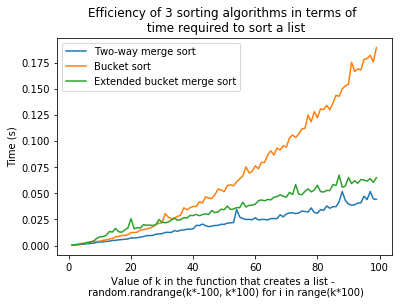

In [22]:
#EFFICIENCY OF THREE ALGORITHMS FOR RANDOMIZED LISTS WITH WIDE RANGE
x = list(range(1,100))

#plotting three time lists against the x variables
#here we are reusing the x-variable from the previous data visualizations
plt.plot(x,t1_3,label = "Two-way merge sort")
plt.plot(x,t4_3,label = "Bucket sort")
plt.plot(x,t5_3,label = "Extended bucket merge sort")

#creating a title, legend and labeling x and y axes
plt.title("Efficiency of 3 sorting algorithms in terms of \n time required to sort a list")
plt.ylabel("Time (s)")
plt.xlabel("Value of k in the function that creates a list - \n random.randrange(k*-100, k*100) for i in range(k*100)")
plt.legend(loc="upper left")

Our prediction was correct and we can see how for widely distributed lists, the advantage of the extended bucket sort is diminished. 

Once again, it is important to mention that performance of these algorithm is valid not in all cases. The time it takes to sort and algorithm depends on the speed of the computer and therefore, these results would likely be different for more or less powerful computers. A more objective measure of the efficiency would be a number of steps as it would depend solely on the algorithm and not on any characteristics of the computer.

## [Optional challenge] Question 8 (#SortingAlgorithm and/or #ComputationalCritique) 

Implement k-way merge sort, where the user specifies k. Develop and run experiments to support a hypothesis about the “best” value of k.


In [23]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 